In [1]:
import os
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [2]:
script_dir = os.path.dirname(Path().resolve())
os.chdir(script_dir)
os.makedirs(os.path.join(script_dir, 'output'), exist_ok=True)

In [3]:
st_df = pd.read_csv(os.path.join('output', 'sentence-transformers_results.csv'))

Below are results of experiments with different chunkers and hyperparameters along with metrics' means and standard deviations.

In [4]:
def format_mean_std(mean, std):
    return f"{mean:.3f} ± {std:.3f}"

In [17]:
metrics = ['iou', 'recall', 'precision']
st_df_view = st_df.copy()
for metric in metrics:
    st_df_view[metric] = st_df_view.apply(lambda x: format_mean_std(x[metric+'_score'], x[metric+'_score_std']), axis=1)
    st_df_view = st_df_view.drop(columns=[metric+'_score', metric+'_score_std'])
st_df_view

,chunker,chunk_size,overlap_size,top_k,iou,recall,precision
0,fixed-size,800,400,5,0.014 ± 0.009,0.891 ± 0.294,0.014 ± 0.009
1,fixed-size,800,400,10,0.007 ± 0.004,0.978 ± 0.143,0.007 ± 0.004
2,fixed-size,800,400,Min,0.035 ± 0.032,0.699 ± 0.436,0.035 ± 0.032
3,recursive,800,400,5,0.016 ± 0.011,0.884 ± 0.310,0.016 ± 0.011
4,recursive,800,400,10,0.009 ± 0.005,0.972 ± 0.153,0.009 ± 0.005
5,recursive,800,400,Min,0.044 ± 0.050,0.639 ± 0.473,0.044 ± 0.050
6,fixed-size,800,200,5,0.013 ± 0.009,0.839 ± 0.349,0.013 ± 0.009
7,fixed-size,800,200,10,0.008 ± 0.005,0.949 ± 0.213,0.008 ± 0.005
8,fixed-size,800,200,Min,0.024 ± 0.031,0.475 ± 0.487,0.024 ± 0.031
9,recursive,800,200,5,0.016 ± 0.010,0.934 ± 0.244,0.016 ± 0.010


In [19]:
filtered_st_df = st_df.groupby(['top_k']).agg({'precision_score': 'mean', 'recall_score': 'mean'}).reset_index()
filtered_st_df

,top_k,precision_score,recall_score
0,10,0.017549,0.946850
1,5,0.030675,0.852251
2,Min,0.083078,0.565784


The top_k parameter demonstrates a classic precision-recall tradeoff.
As we retrieve more documents, we increase chance of obtaining relevant information (high recall) but that way we delute precision.

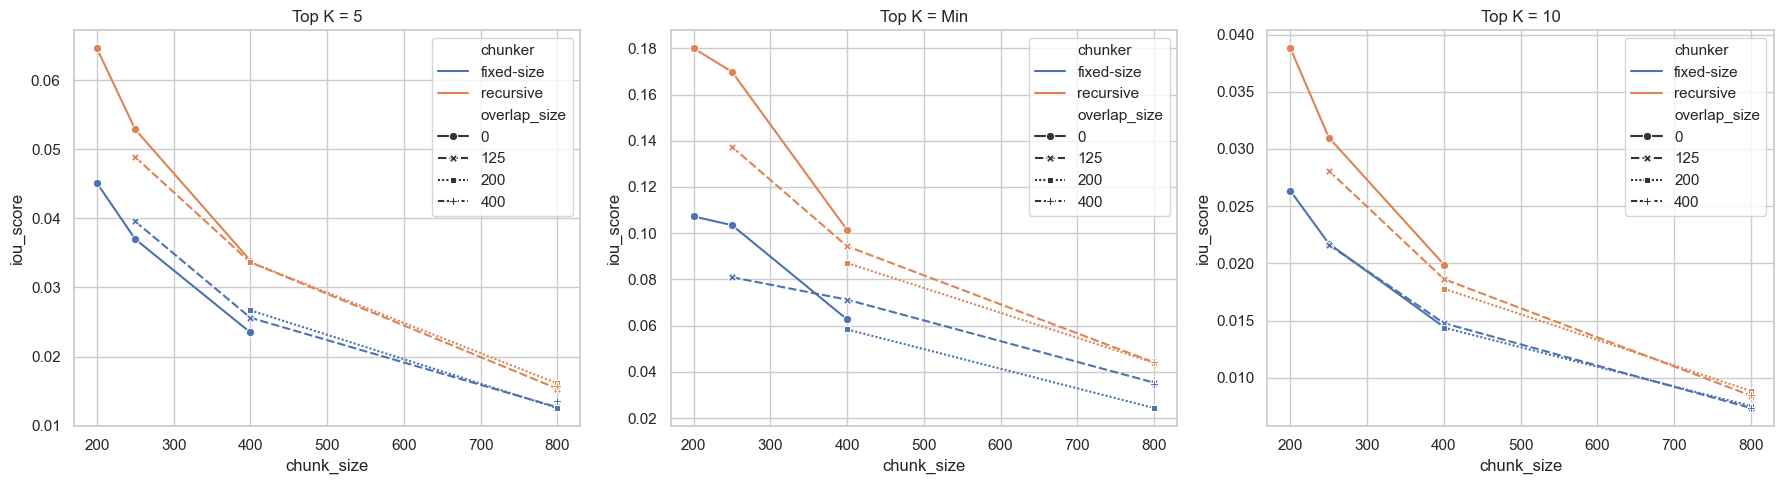

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# For top_k = 5
sns.lineplot(
    data=st_df[st_df['top_k'] == '5'],
    x='chunk_size',
    y='iou_score',
    hue='chunker',
    style='overlap_size',
    markers=True,
    ax=ax1
)
ax1.set_title('Top K = 5')

# For top_k = Min
sns.lineplot(
    data=st_df[st_df['top_k'] == 'Min'],
    x='chunk_size',
    y='iou_score',
    hue='chunker',
    style='overlap_size',
    markers=True,
    ax=ax2
)
ax2.set_title('Top K = Min')

# For top_k = 10
sns.lineplot(
    data=st_df[st_df['top_k'] == '10'],
    x='chunk_size',
    y='iou_score',
    hue='chunker',
    style='overlap_size',
    markers=True,
    ax=ax3
)
ax3.set_title('Top K = 10')

plt.tight_layout()

We can take the mean iou_score for every chunk_size and visualize it better.

<Axes: xlabel='chunk_size', ylabel='iou_score'>

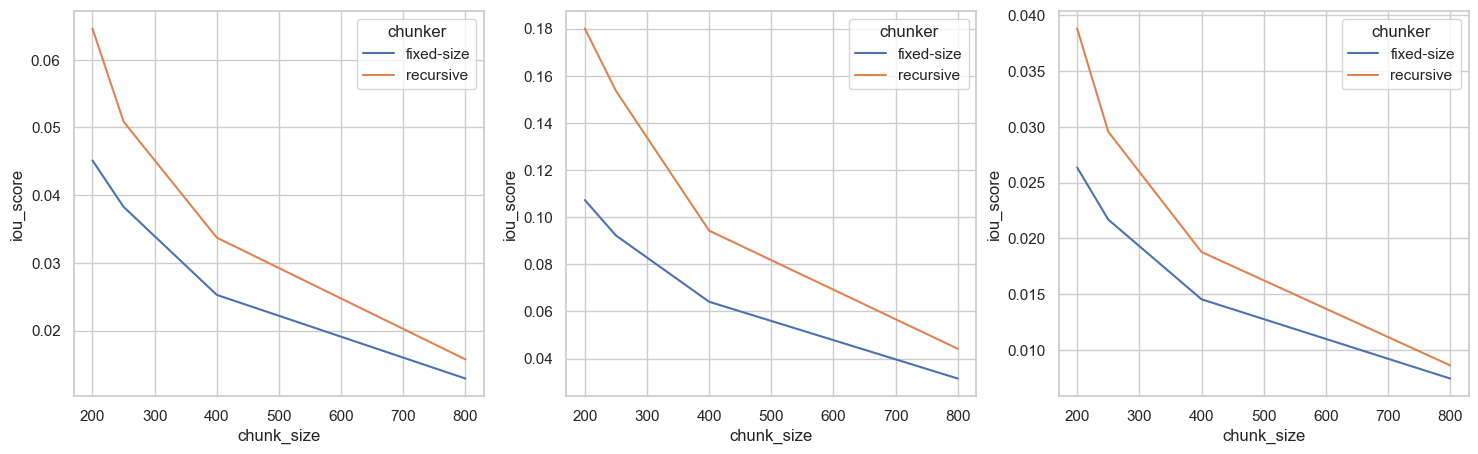

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
filtered_st_df = st_df.groupby(['chunker', 'chunk_size', 'top_k']).agg({'iou_score': 'mean'}).reset_index()
sns.lineplot(data=filtered_st_df[filtered_st_df['top_k'] == '5'], x='chunk_size', y='iou_score', hue='chunker', ax=ax1)
sns.lineplot(data=filtered_st_df[filtered_st_df['top_k'] == 'Min'], x='chunk_size', y='iou_score', hue='chunker', ax=ax2)
sns.lineplot(data=filtered_st_df[filtered_st_df['top_k'] == '10'], x='chunk_size', y='iou_score', hue='chunker', ax=ax3)

As we can observe, iou_score decreases with increasing chunk_size

For example, let's take top_k=5:
At chunk_size=200: recursive chunker achieves 0.065 IOU
At chunk_size=800: similar configurations achieve only ~0.016 IOU
That's approx. 75% reduction in IoU.

When chunk_size is big, each chunk contains more tokens, possibly leading to much more noise (irrelevant tokens).
Therefore, IoU score's denominator increases gradually.

Without loss of generality, let's set overlap_size=0 and compare the performance of the two chunkers.

<Axes: xlabel='chunk_size', ylabel='iou_score'>

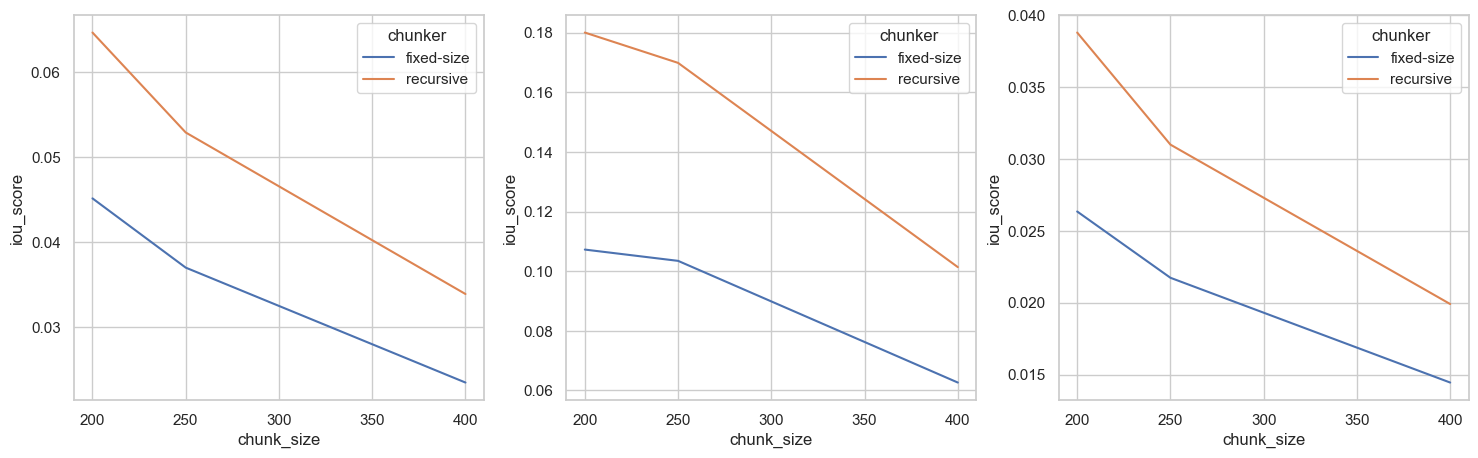

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
filtered_gpt_df = st_df[st_df['overlap_size'] == 0]
filtered_gpt_df = filtered_gpt_df.groupby(['chunker', 'chunk_size', 'top_k']).agg({'iou_score': 'mean'}).reset_index()
sns.lineplot(data=filtered_gpt_df[filtered_gpt_df['top_k'] == '5'], x='chunk_size', y='iou_score', hue='chunker', ax=ax1)
sns.lineplot(data=filtered_gpt_df[filtered_gpt_df['top_k'] == 'Min'], x='chunk_size', y='iou_score', hue='chunker', ax=ax2)
sns.lineplot(data=filtered_gpt_df[filtered_gpt_df['top_k'] == '10'], x='chunk_size', y='iou_score', hue='chunker', ax=ax3)

Recursive chunking consistently outperforms fixed-size chunking across almost all configurations.


Text(0.5, 1.0, 'Performance Distribution by Chunker and Top-K')

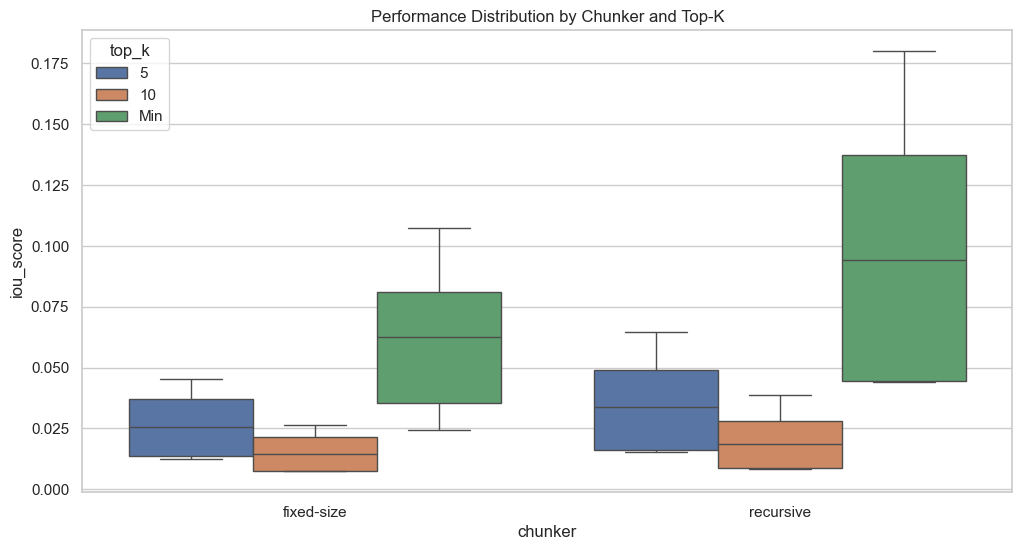

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=st_df, x='chunker', y='iou_score', hue='top_k')
plt.title('Performance Distribution by Chunker and Top-K')

Increasing top_k to 10 doesn't always improve results and can sometimes hurt performance by adding noise. Overall, recursive chunking with a carefully tuned top_k offers the most effective retrieval setup.

Text(0.5, 1.0, 'Standard Deviation Heatmap: Chunk Size vs Overlap')

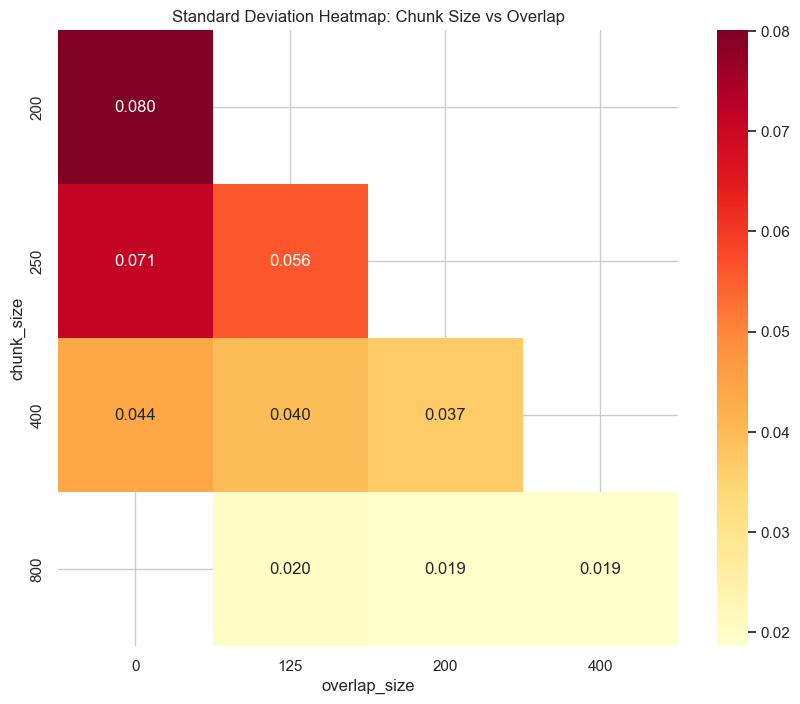

In [29]:
pivot_std = st_df.pivot_table(
    values='iou_score_std',
    index='chunk_size',
    columns='overlap_size',
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_std, annot=True, fmt='.3f', cmap='YlOrRd')
plt.title('Standard Deviation Heatmap: Chunk Size vs Overlap')

Overall, the standard deviation is quite low, indicating that the retrieval performance is stable and data points are only lightly spread around the mean.
The standard deviation is higher for smaller chunk sizes and smaller overlap sizes.
This pattern suggests the system becomes more stable with larger chunks and overlaps, possibly due to better context preservation and reduced fragmentation of information.

Let's extract the maximum values of recall, iou, and precision for each top_k configuration.

In [27]:
def max_values(df):
    max_recall = df.loc[df['recall'].idxmax()]
    max_iou = df.loc[df['iou'].idxmax()]
    max_precision = df.loc[df['precision'].idxmax()]
    
    return max_recall, max_iou, max_precision

In [28]:
st_max_all = pd.DataFrame()

for k in ['5', '10', 'Min']:
    df = st_df_view[st_df_view['top_k'] == k]
    max_st_recall, max_st_iou, max_st_precision = max_values(df)
    
    st_max = pd.DataFrame([max_st_recall, max_st_iou, max_st_precision], 
                          index=['max-recall', 'max-iou', 'max-precision'])
    
    st_max_all = pd.concat([st_max_all, st_max], axis=0)
    
st_max_all

,chunker,chunk_size,overlap_size,top_k,iou,recall,precision
max-recall,recursive,800,200,5,0.016 ± 0.010,0.934 ± 0.244,0.016 ± 0.010
max-iou,recursive,200,0,5,0.065 ± 0.050,0.778 ± 0.392,0.065 ± 0.050
max-precision,recursive,200,0,5,0.065 ± 0.050,0.778 ± 0.392,0.065 ± 0.050
max-recall,recursive,800,200,10,0.009 ± 0.005,0.993 ± 0.083,0.009 ± 0.005
max-iou,recursive,200,0,10,0.039 ± 0.026,0.883 ± 0.297,0.039 ± 0.026
max-precision,recursive,200,0,10,0.039 ± 0.026,0.883 ± 0.297,0.039 ± 0.026
max-recall,fixed-size,800,400,Min,0.035 ± 0.032,0.699 ± 0.436,0.035 ± 0.032
max-iou,recursive,200,0,Min,0.180 ± 0.231,0.510 ± 0.483,0.185 ± 0.236
max-precision,recursive,200,0,Min,0.180 ± 0.231,0.510 ± 0.483,0.185 ± 0.236


We can conduct few interesting configurations of hyperparameters:

#### Highest IoU/Precision Configuration
- Chunker: Recursive
- Chunk Size: 200
- Overlap Size: 0
- Top K: Min

#### Highest Recall Configuration
- Chunker: Recursive
- Chunk Size: 800
- Overlap Size: 200
- Top K: 10

#### Overall Well-Performing Configurations
##### Configuration 1
- Chunker: Recursive
- Chunk Size: 200
- Overlap Size: 0
- Top K: 5
##### Configuration 2
- Chunker: Recursive
- Chunk Size: 200
- Overlap Size: 0
- Top K: 10